<a href="https://colab.research.google.com/github/harshit4311/Loan-Approval-System-QuantSight/blob/main/QuantSight-Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats


print('done')

done


In [ ]:
df = pd.read_csv('/content/loan_approval_data.csv')

In [ ]:
df

,loan_id,no_of_dependents,education,self_employed,employment_type,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,12th,No,Salaried,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,12th,No,Salaried,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,8th,No,Salaried,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,8th,No,Salaried,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Graduate,No,Salaried,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,8th,Yes,Business,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,8th,Yes,Business,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,8th,Yes,Business,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Graduate,No,Salaried,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [ ]:
df.drop('loan_id', axis = 1 , inplace = True)


In [ ]:
df


,no_of_dependents,education,self_employed,employment_type,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,12th,No,Salaried,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,12th,No,Salaried,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,8th,No,Salaried,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,8th,No,Salaried,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Graduate,No,Salaried,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,8th,Yes,Business,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,8th,Yes,Business,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,8th,Yes,Business,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Graduate,No,Salaried,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   employment_type           4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(9), object(4)
memory usage: 433.7+ KB


In [ ]:
df.columns


Index(['no_of_dependents', 'education', 'self_employed', 'employment_type',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [ ]:
cat_cols = ['no_of_dependents', 'education', 'self_employed', 'loan_status']


In [ ]:
for col in cat_cols:
    print( df[col].value_counts())
    print("-" * 20)

no_of_dependents
4    752
3    727
0    712
2    708
1    697
5    673
Name: count, dtype: int64
--------------------
education
10th        1126
8th         1072
12th        1062
Graduate    1009
Name: count, dtype: int64
--------------------
self_employed
Yes    2168
No     2101
Name: count, dtype: int64
--------------------
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64
--------------------


In [ ]:
df['loan_status'].value_counts(normalize=True)


,proportion
loan_status,
Approved,0.62216
Rejected,0.37784


In [ ]:
df.isnull().sum()


,0
no_of_dependents,0
education,0
self_employed,0
employment_type,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [50]:
# feature analysis
df.describe(include="number")


,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [51]:
df[df.bank_asset_value > 14500000]


,no_of_dependents,education,self_employed,employment_type,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1272,5,12th,Yes,Business,9900000,35800000,20,470,9500000,18400000,39100000,14700000,Rejected
1633,0,12th,No,Salaried,9800000,23200000,10,573,23900000,3300000,23600000,14600000,Approved
1674,1,10th,No,Salaried,9800000,21300000,2,356,23000000,12300000,25700000,14600000,Rejected
1805,5,8th,No,Salaried,9900000,33600000,20,580,7000000,10800000,37400000,14700000,Approved


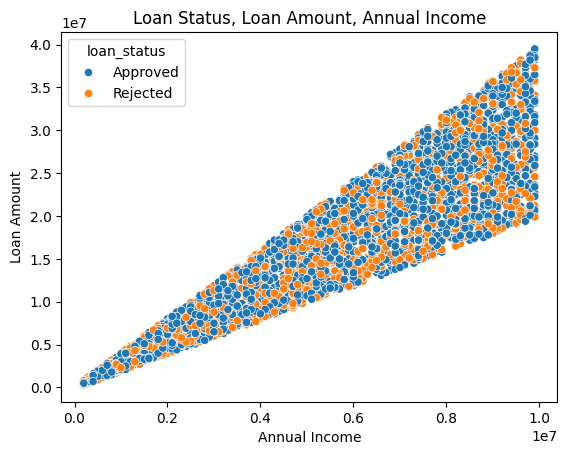

In [56]:
# Loan Status, Loan Amount, Annual Income

sns.scatterplot(x=df['income_annum'], y= df['loan_amount'], hue=df['loan_status'])
plt.title("Loan Status, Loan Amount, Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.show()

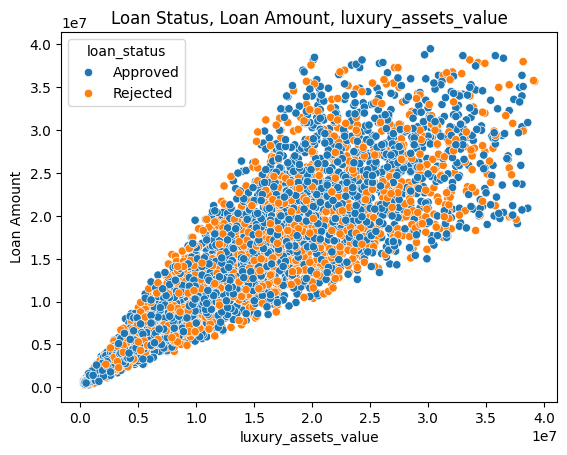

In [57]:
# Loan Status, Loan Amount, luxury_assets_value

sns.scatterplot(x=df['luxury_assets_value'], y= df['loan_amount'], hue=df['loan_status'])
plt.title("Loan Status, Loan Amount, luxury_assets_value")
plt.xlabel("luxury_assets_value")
plt.ylabel("Loan Amount")
plt.show()

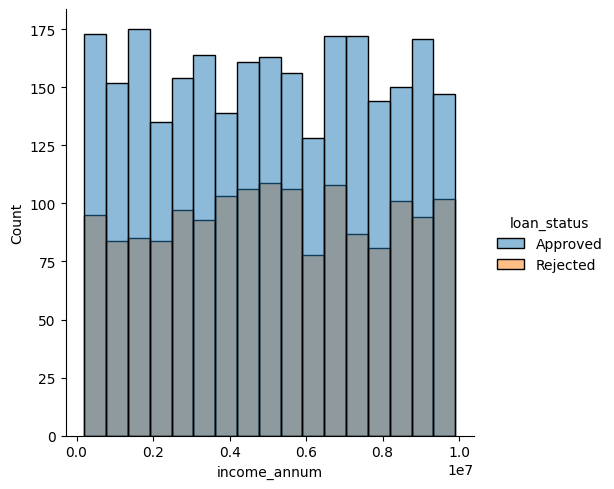

In [60]:
sns.displot(data=df , x ="income_annum", hue='loan_status')


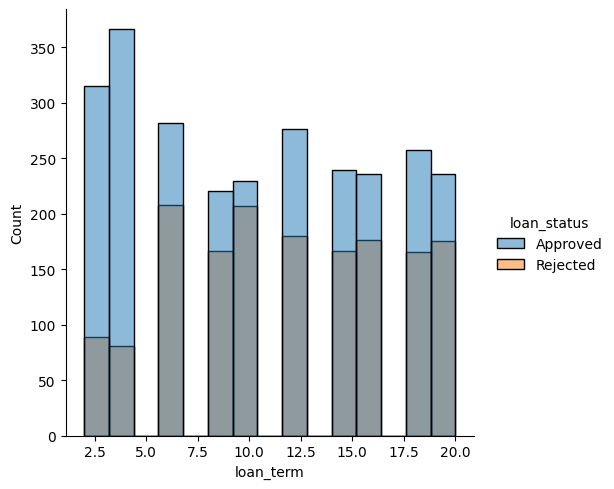

In [61]:
sns.displot(data=df, x ="loan_term", hue='loan_status')


# Observation:

short loan terms are more approved than long terms

In [63]:
def detect_outliers_iqr(df, columns):
  Q1 = df[columns].quantile(0.25)
  Q3 = df[columns].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[columns] < lower_bound) | (df[columns] > upper_bound)].any(axis=1)
  return outliers

In [64]:
outliers_iqr = detect_outliers_iqr(df, ['loan_term','income_annum','residential_assets_value','luxury_assets_value','bank_asset_value'])
print("Outliers using IQR:\n", outliers_iqr.sum())

Outliers using IQR:
 57


In [65]:
# pre-processing data

df.loan_term.describe()


,loan_term
count,4269.000000
mean,10.900445
std,5.709187
min,2.000000
25%,6.000000
50%,10.000000
75%,16.000000
max,20.000000


In [67]:
df.loan_term = df.loan_term * 365
df.loan_term.describe()


,loan_term
count,4.269000e+03
mean,1.452212e+06
std,7.606065e+05
min,2.664500e+05
25%,7.993500e+05
50%,1.332250e+06
75%,2.131600e+06
max,2.664500e+06


In [69]:
df.columns


Index(['no_of_dependents', 'education', 'self_employed', 'employment_type',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [70]:
categorical_features = ['education', 'self_employed', 'loan_status']


In [71]:
cat_df = df[categorical_features]
